解决类别不平衡数据方法介绍

1.过采样方法

    1.1.什么是过采样方法
    对于训练集里的少数类进行“过采样”，
    即增加一些少数类样本使得正、反比例数目接近，然后再进行学习。

    1.2.随机过采样方法
    随机过采样是在少数类S(min)中随机选择一些样本，然后通过复制所选择的样本生成样本集E，
    将它们添加到S(min)中来扩大原始数据集从而得到新的少数类集合S(new-min)，
    新的数据集S(new-min) = S(min) + E

In [1]:
# 创造数据集
from sklearn.datasets import  make_classification
import matplotlib.pyplot as plt

# 使用make_classification生成样本数据（类别不平衡）
x, y= make_classification(
    n_samples=5000,     # 生成的样本点个数
    n_features=2,     # 特征个数=n_informative{}+n_redundant+n_repeated
    n_informative=2,    # 多信息特征个数
    n_redundant=0,      # 冗余信息，informative特征的随机线性组合
    n_repeated=0,       # 重复信息，随即提取n_informative和n_redundant特征
    n_classes=3,        # 分类类别
    n_clusters_per_class=1,     # 第一个类别是由几个cluster构成的，即一个类别是由几个组构成
    weights=[0.01, 0.05, 0.94],     # 列表类型，权重比
    random_state=0
)

In [2]:
# 查看各个标签的样本量
from collections import Counter
Counter(y)

Counter({np.int64(2): 4674, np.int64(1): 262, np.int64(0): 64})

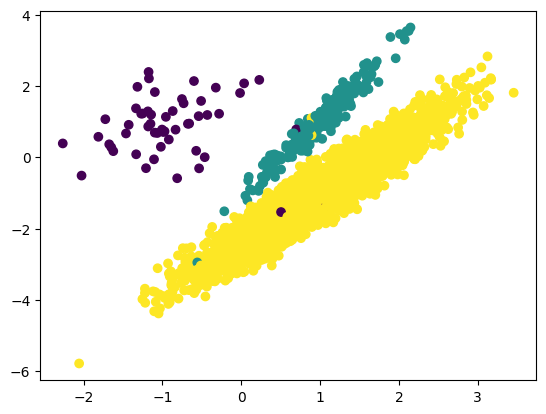

In [3]:
# 数据集可视化
# x[:, 0]  所有行第0列特征
# x[:, 1]  所有行第1列特征
# c=y 表示基于y这个类别进行分类
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [4]:
# 通过代码实现随机过采样方法：
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled,y_resampled = ros.fit_resample(x, y)

In [5]:
# 查看结果
Counter(y_resampled)

Counter({np.int64(2): 4674, np.int64(1): 4674, np.int64(0): 4674})

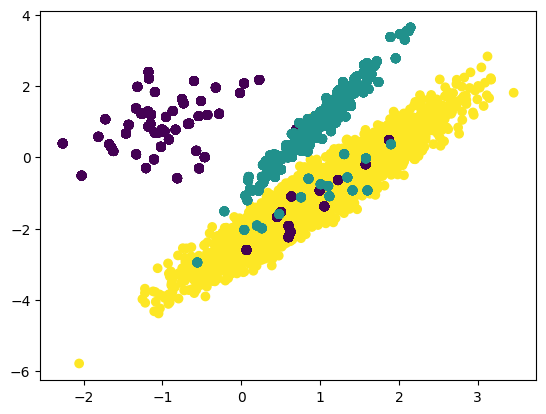

In [6]:
# 过采样后数据集可视化
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=y_resampled)
plt.show()

    随机过采样缺点：
        （1）对于随机过采样，由于对少数类样本进行复制粘贴来扩大数据集，造成模型训练复杂度加大。
        （2）另一方面也容易造成模型的过拟合问题，因为随机过采样是简单的对初始样本进行复
            制采样，这就使得学习器学习的规则过于具体化，不利于学习器的泛化性能，造成过
            拟合问题。

    为了解决随机过采样中造成过拟合问题，又能保证实现数据集均衡的目的，出现了采样法代表性
    的算法SMOTE算法

2.过采样代表性算法--SMOTE

    SMOTE全称：Synthetic Minority Oversampling，即合成少数类过采样技术

    SMOTE算法是对随机过采样方法的一个改进算法，由于随机过采样方法是直接对少数类继续宁重
    采样，会使训练集中有很多重复的样本，容易造成产生的模型过拟合问题。而SMOTE算法的基本
    思想是对每个少数类样本xi，从它的最近邻中随机选择一个样本x'i（x’i是少数类中的一个样
    本），然后在xi和x'i之间的连线上随机选择一点作为新合成的少数类样本。

    SMOTE算法合成新少数类样本的算法描述如下：
        （1）对于少数类中的每一个样本xi，以欧式距离为标准计算它到少数类样本集Smin中所
            有样本的距离，得到其k近邻
        （2）根据样本不平衡比例设置一个采样比例以确定采样倍率N，对于每一个少数类样本xi
            ，从其k近邻中随机选择若干个样本，假设选择的是x'i
        （3）对于每一个随机选出来的近邻x'i，分别与xi按照如下公式构建新的样本
![jupyter](../../Sources/Pictures/Logical_Regression/SMOTE公式.png)

    我们用图文表达的方式，再来描述一下SMOTE算法。

    （1）先随机选定一个少数类样本xi
![jupyter](../../Sources/Pictures/Logical_Regression/随机过采样图解-1.png)

    （2）找出这个少数类样本xi的k个近邻（假设k=5）.5个近邻已经被圈出
![jupyter](../../Sources/Pictures/Logical_Regression/随机过采样图解-2.png)

    （3）随即从这k个近邻中选出一个样本x'i（用绿色圈出来）
![jupyter](../../Sources/Pictures/Logical_Regression/随机过采样图解-3.png)

    （4）在少数类样本xi和被选中的这个近邻样本x'i之间的连线上，找一点，这个点就是人工
        合成的新的样本点（绿色正号标出）
![jupyter](../../Sources/Pictures/Logical_Regression/随机过采样图解-4.png)

    SMOTE算法摒弃嘞随机过采样复制样本的算法，可以防止随机过采样中容易过拟合的问题，实
    践证明此方法可以提高分类器的性能。

In [7]:
from imblearn.over_sampling import SMOTE
x_resampled, y_resampled = SMOTE().fit_resample(x, y)

In [8]:
Counter(y_resampled)

Counter({np.int64(2): 4674, np.int64(1): 4674, np.int64(0): 4674})

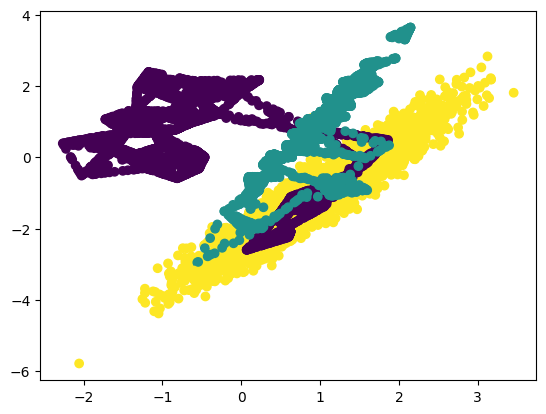

In [9]:
# 过采样后数据集可视化
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=y_resampled)
plt.show()

3.欠采样方法

    3.1.什么是欠采样方法
    直接对训练集中多数类样本进行“欠采样”（undersampling），即去除一些多数类中的样
    本使得正例、反例数目接近，然后再进行学习

    3.2.随机欠采样方法
    随机欠采样顾名思义即从多数类S(maj)中随机选择一些样本组合成样本集E。然后将样本集E
    从S(maj)中移除。新的数据集S(new-maj)=S(maj)-E

In [10]:
# 随机欠采样代码实现
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [11]:
Counter(y_resampled)

Counter({np.int64(0): 64, np.int64(1): 64, np.int64(2): 64})

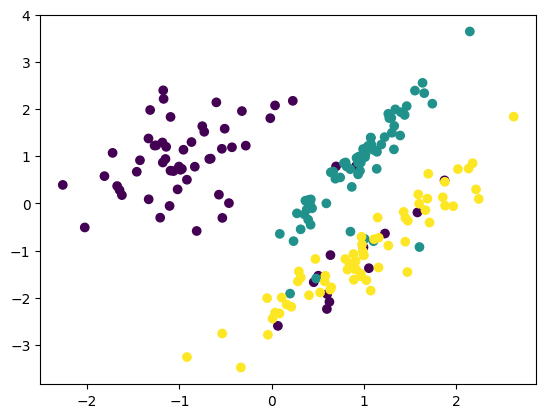

In [12]:
plt.scatter(x_resampled[:, 0], x_resampled[:, 1], c=y_resampled)
plt.show()

    随机欠采样缺点：
        随机欠采样方法通过改变多数类样本比例以达到修改样本分布的目的，从而使样本分布
        较为均衡，但是这也存在一些问题。对于随机欠采样，由于采样的样本集合要少于原来
        的样本集合，会因此造成一些信息缺失，即将多数类样本删除可能会导致分类器丢失有
        关多数类的重要信息。
[官方链接](https://imbalanced-learn.readthedocs.io/en/stable/ensemble.html)